<a href="https://colab.research.google.com/github/ZainulAbideen000748/Machine-Learning-Project-Inventory-/blob/main/Final_ML_Project_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BLOCK-1 — Imports

In [ ]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

sns.set_style('whitegrid')
print("Imports loaded")

Imports loaded


## BLOCK-2 — Load Data

In [3]:
from google.colab import files

uploaded = files.upload()
df = pd.read_csv("sales_train_validation.csv")
print(df)

Saving sales_train_validation.csv to sales_train_validation.csv


NameError: name 'pd' is not defined

In [ ]:
from google.colab import files

uploaded = files.upload()
cal = pd.read_csv("calendar.csv")
print(df)

Saving calendar.csv to calendar (1).csv
            date  wm_yr_wk    weekday  wday  month  year       d  \
0     2011-01-29     11101   Saturday     1      1  2011     d_1   
1     2011-01-30     11101     Sunday     2      1  2011     d_2   
2     2011-01-31     11101     Monday     3      1  2011     d_3   
3     2011-02-01     11101    Tuesday     4      2  2011     d_4   
4     2011-02-02     11101  Wednesday     5      2  2011     d_5   
...          ...       ...        ...   ...    ...   ...     ...   
1964  2016-06-15     11620  Wednesday     5      6  2016  d_1965   
1965  2016-06-16     11620   Thursday     6      6  2016  d_1966   
1966  2016-06-17     11620     Friday     7      6  2016  d_1967   
1967  2016-06-18     11621   Saturday     1      6  2016  d_1968   
1968  2016-06-19     11621     Sunday     2      6  2016  d_1969   

      event_name_1 event_type_1  event_name_2 event_type_2  snap_CA  snap_TX  \
0              NaN          NaN           NaN          NaN     

## BLOCK-3 — Melt Wide → Long

In [ ]:
day_cols=[c for c in df.columns if c.startswith('d_')]
long_df=df.melt(id_vars=['id','item_id','store_id'], value_vars=day_cols,
                var_name='day', value_name='daily_sales')
print(long_df)
print(long_df.shape)

NameError: name 'df' is not defined

## BLOCK-4 — Filter Store CA_1

In [ ]:
long_df=long_df[long_df['store_id']=='CA_1']
print(long_df.head)

<bound method NDFrame.head of                                      id        item_id store_id     day  \
0         HOBBIES_1_001_CA_1_validation  HOBBIES_1_001     CA_1     d_1   
1         HOBBIES_1_002_CA_1_validation  HOBBIES_1_002     CA_1     d_1   
2         HOBBIES_1_003_CA_1_validation  HOBBIES_1_003     CA_1     d_1   
3         HOBBIES_1_004_CA_1_validation  HOBBIES_1_004     CA_1     d_1   
4         HOBBIES_1_005_CA_1_validation  HOBBIES_1_005     CA_1     d_1   
...                                 ...            ...      ...     ...   
58299924    FOODS_3_823_CA_1_validation    FOODS_3_823     CA_1  d_1913   
58299925    FOODS_3_824_CA_1_validation    FOODS_3_824     CA_1  d_1913   
58299926    FOODS_3_825_CA_1_validation    FOODS_3_825     CA_1  d_1913   
58299927    FOODS_3_826_CA_1_validation    FOODS_3_826     CA_1  d_1913   
58299928    FOODS_3_827_CA_1_validation    FOODS_3_827     CA_1  d_1913   

          daily_sales  
0                   0  
1                   0

## BLOCK-5 — Merge Calendar

In [ ]:
df_merged=long_df.merge(cal[['d','date','weekday','month','year']],
                          left_on='day', right_on='d', how='left')
df_merged['date']=pd.to_datetime(df_merged['date'])
print(df_merged.shape)

(5832737, 10)


## BLOCK-6 — EDA (Basic Stats & Plots)

        daily_sales                           date         month          year
count  5.832737e+06                        5832737  5.832737e+06  5.832737e+06
mean   1.319829e+00  2013-09-10 23:59:59.999999744  6.357554e+00  2.013209e+03
min    0.000000e+00            2011-01-29 00:00:00  1.000000e+00  2.011000e+03
25%    0.000000e+00            2012-05-21 00:00:00  3.000000e+00  2.012000e+03
50%    0.000000e+00            2013-09-11 00:00:00  6.000000e+00  2.013000e+03
75%    1.000000e+00            2015-01-02 00:00:00  9.000000e+00  2.015000e+03
max    6.480000e+02            2016-04-24 00:00:00  1.200000e+01  2.016000e+03
std    4.058652e+00                            NaN  3.458773e+00  1.532086e+00


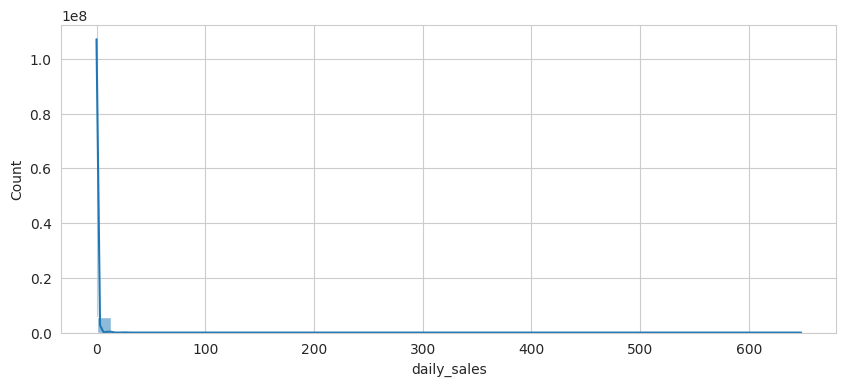

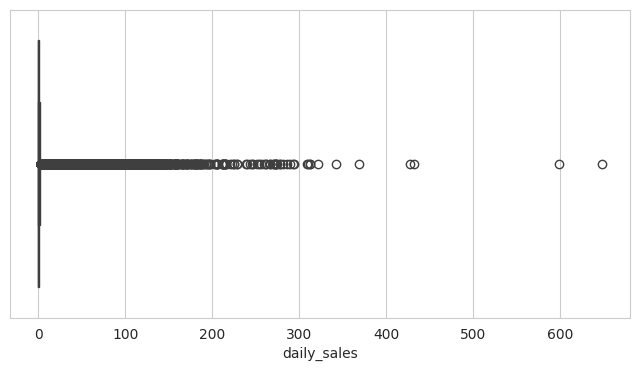

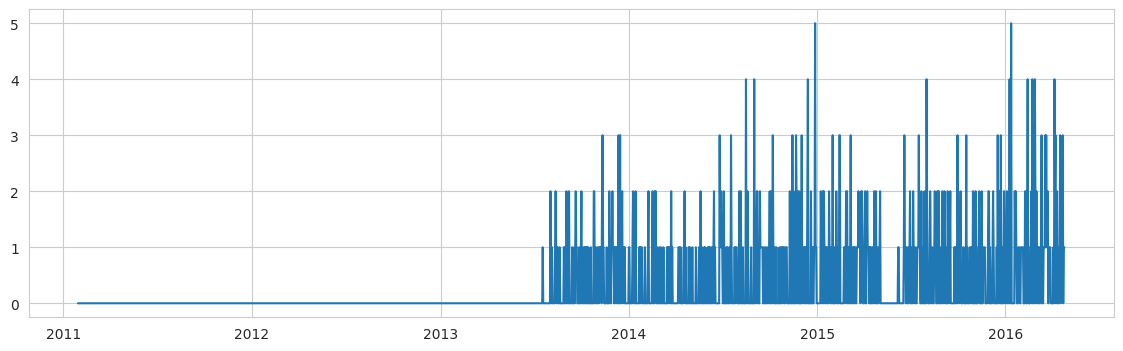

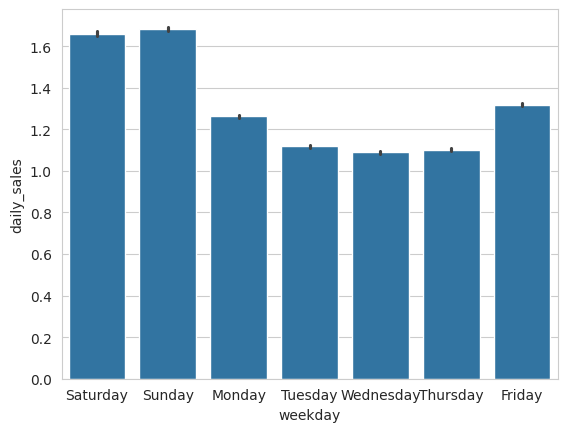

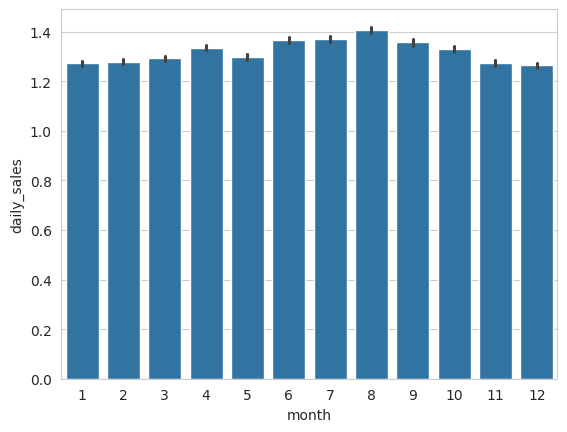

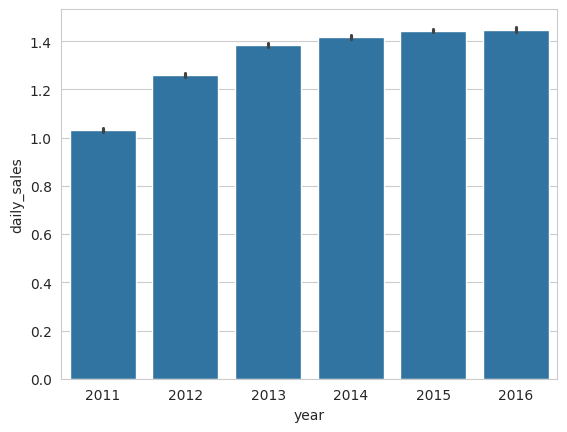

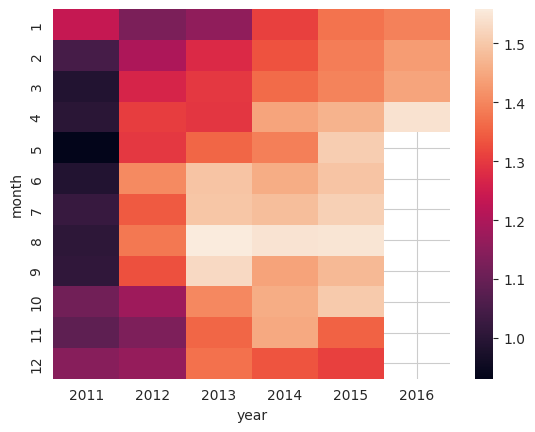

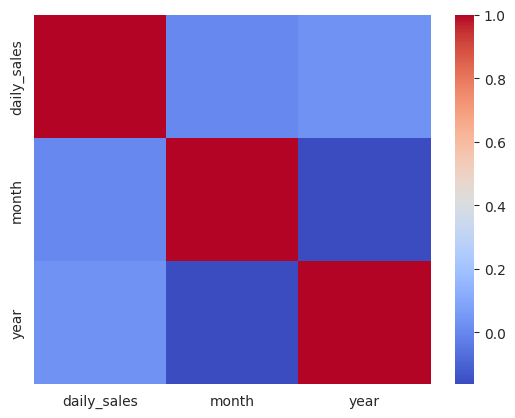

In [ ]:
print(df_merged.describe())
plt.figure(figsize=(10,4)); sns.histplot(df_merged['daily_sales'], bins=50, kde=True); plt.show()
plt.figure(figsize=(8,4)); sns.boxplot(x=df_merged['daily_sales']); plt.show()
sid=df_merged['id'].iloc[0]
s=df_merged[df_merged['id']==sid]
plt.figure(figsize=(14,4)); plt.plot(s['date'], s['daily_sales']); plt.show()
sns.barplot(x='weekday', y='daily_sales', data=df_merged); plt.show()
sns.barplot(x='month', y='daily_sales', data=df_merged); plt.show()
sns.barplot(x='year', y='daily_sales', data=df_merged); plt.show()
pivot=df_merged.pivot_table(index='month', columns='year', values='daily_sales', aggfunc='mean')
sns.heatmap(pivot); plt.show()
num=df_merged.select_dtypes(include=[np.number])
sns.heatmap(num.corr(), cmap='coolwarm'); plt.show()

## BLOCK-7 — Lag & Rolling Features

In [ ]:
df_merged=df_merged.sort_values(['id','date'])
df_merged['lag_1']=df_merged.groupby('id')['daily_sales'].shift(1)
df_merged['lag_7']=df_merged.groupby('id')['daily_sales'].shift(7)
df_merged['rolling_mean_3']=df_merged.groupby('id')['daily_sales'].rolling(3).mean().reset_index(0,drop=True)
df_merged['rolling_mean_7']=df_merged.groupby('id')['daily_sales'].rolling(7).mean().reset_index(0,drop=True)
df_fe=df_merged.dropna()
print(df_fe.shape)

NameError: name 'df_merged' is not defined

## BLOCK-8 — One-Hot Encoding

In [ ]:
import pandas as pd
df_fe=pd.get_dummies(df_fe, columns=['weekday'], drop_first=True)
print(df_fe.shape)

NameError: name 'df_fe' is not defined

## BLOCK-9 — Train-Test Split

In [ ]:
features=[c for c in df_fe.columns if c.startswith('lag_') or c.startswith('rolling') or
          c in ['month','year'] or c.startswith('weekday_')]
X=df_fe[features]; y=df_fe['daily_sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape, X_test.shape)

(4649115, 12) (1162279, 12)


In [ ]:
# BLOCK-9A — Scaling for Neural Network (only for TF model)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling complete for NN model.")


Scaling complete for NN model.


## BLOCK-10 — Classical Models

In [ ]:
results={}
for name,model in [('Linear',LinearRegression()),('Ridge',Ridge()),('Lasso',Lasso())]:
    model.fit(X_train,y_train); pred=model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    results[name]=[
        mean_absolute_error(y_test,pred),
        rmse,
        r2_score(y_test,pred)
    ]
results_df=pd.DataFrame(results, index=['MAE','RMSE','R2']).T
results_df

,MAE,RMSE,R2
Linear,0.651641,1.544083,0.852428
Ridge,0.651641,1.544083,0.852428
Lasso,0.727867,1.762741,0.807673


## BLOCK-11 — TensorFlow Model + Train

In [ ]:
tf_model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(1)
])
tf_model.compile(optimizer='adam', loss='mse')
history=tf_model.fit(X_train_scaled,y_train,epochs=5,batch_size=256,validation_split=0.2,verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
14529/14529 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 2.7733 - val_loss: 2.4364
Epoch 2/5
14529/14529 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 2.1631 - val_loss: 2.2976
Epoch 3/5
14529/14529 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 2.1387 - val_loss: 2.3114
Epoch 4/5
14529/14529 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 2.1227 - val_loss: 2.3187
Epoch 5/5
14529/14529 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 2.1800 - val_loss: 2.3858


## BLOCK-12 — Training Curves (Loss vs Val-Loss)

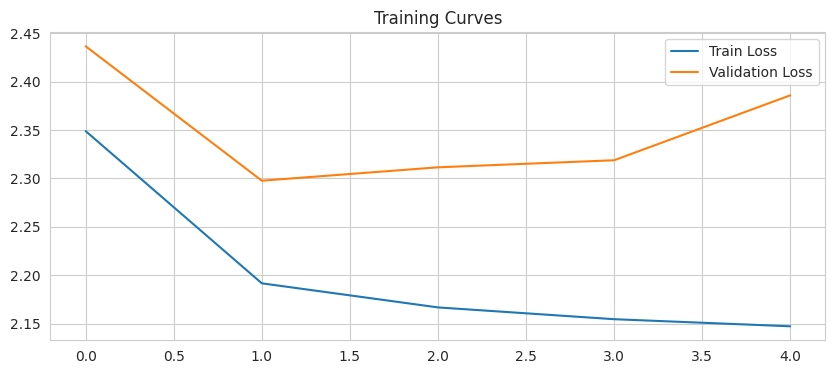

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(); plt.title('Training Curves'); plt.show()

## BLOCK-13 — Epoch Metrics Table

In [ ]:
epoch_metrics=pd.DataFrame(history.history); epoch_metrics.index+=1; epoch_metrics

,loss,val_loss
1,2.348797,2.436423
2,2.191645,2.297623
3,2.166775,2.311442
4,2.154607,2.318735
5,2.147293,2.385759


## BLOCK-14 — Evaluate TensorFlow Model

In [ ]:
pred_tf=tf_model.predict(X_test_scaled).flatten()
mse_tf = mean_squared_error(y_test, pred_tf)
rmse_tf = np.sqrt(mse_tf)

results['TensorFlow']=[mean_absolute_error(y_test,pred_tf),
                       rmse_tf,
                       r2_score(y_test,pred_tf)]
results_df=pd.DataFrame(results, index=['MAE','RMSE','R2']).T
results_df

36322/36322 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step


,MAE,RMSE,R2
Linear,0.651641,1.544083,0.852428
Ridge,0.651641,1.544083,0.852428
Lasso,0.727867,1.762741,0.807673
TensorFlow,0.561515,1.474404,0.865446


## BLOCK-15 — Styled Model Comparison Table

In [ ]:
def highlight_best(s): return ['font-weight: bold' if (x==s.min() or x==s.max()) else '' for x in s]
results_df.style.apply(highlight_best, axis=0)

,MAE,RMSE,R2
Linear,0.651641,1.544083,0.852428
Ridge,0.651641,1.544083,0.852428
Lasso,0.727867,1.762741,0.807673
TensorFlow,0.561515,1.474404,0.865446


## BLOCK-16 — Stockout Risk Calculation

In [ ]:
df_fe['predicted_sales']=tf_model.predict(df_fe[features]).flatten()
df_fe['inventory_level']=10
df_fe['stockout_risk']=df_fe['predicted_sales']-df_fe['inventory_level']
df_fe['stockout_flag']=(df_fe['predicted_sales']>df_fe['inventory_level']).astype(int)
df_fe[['predicted_sales','inventory_level','stockout_risk','stockout_flag']].head()

181607/181607 ━━━━━━━━━━━━━━━━━━━━ 245s 1ms/step


,predicted_sales,inventory_level,stockout_risk,stockout_flag
22955,196.819656,10,186.819656,1
26004,193.633911,10,183.633911,1
29053,193.171600,10,183.171600,1
32102,190.334473,10,180.334473,1
35151,193.043274,10,183.043274,1


## BLOCK-17 — Stockout Summary, Visualization & Interpretation

Total Predictions: 5811394
Stockout Events: 5811394
Stockout Rate: 1.0


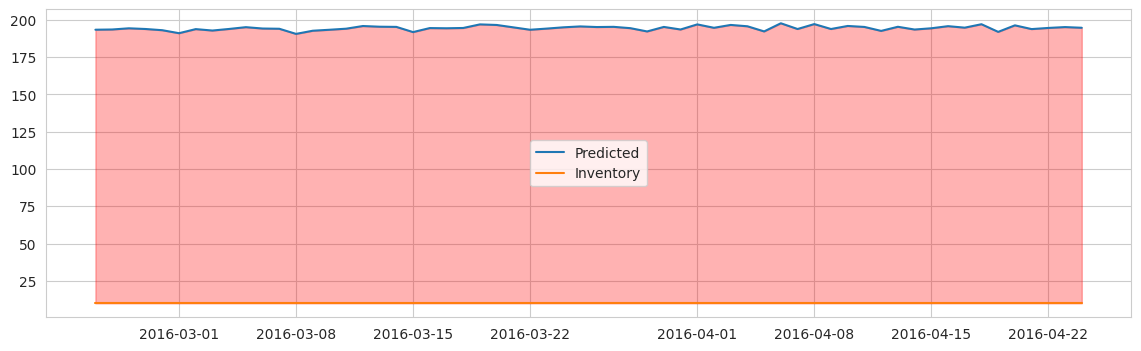


Interpretation:
- Best model by lowest RMSE: TensorFlow
- Stockout risk indicates potential lost sales if inventory < demand
- Supports supply chain planning & replenishment decisions

Week-4 Next Steps: tuning, dashboards, business thresholds, deployment prep


In [ ]:
total=len(df_fe); stock=df_fe['stockout_flag'].sum()
print('Total Predictions:',total)
print('Stockout Events:',stock)
print('Stockout Rate:',stock/total)

sid=df_fe['id'].iloc[0]; sub=df_fe[df_fe['id']==sid].tail(60)
plt.figure(figsize=(14,4))
plt.plot(sub['date'], sub['predicted_sales'], label='Predicted')
plt.plot(sub['date'], sub['inventory_level'], label='Inventory')
plt.fill_between(sub['date'], sub['inventory_level'], sub['predicted_sales'],
                 where=sub['predicted_sales']>sub['inventory_level'],
                 color='red', alpha=0.3)
plt.legend(); plt.show()

print("\nInterpretation:")
print("- Best model by lowest RMSE:", results_df['RMSE'].idxmin())
print("- Stockout risk indicates potential lost sales if inventory < demand")
print("- Supports supply chain planning & replenishment decisions")
print("\nWeek-4 Next Steps: tuning, dashboards, business thresholds, deployment prep")

In [ ]:
# BLOCK-18: Retrain Final TensorFlow Model (Best Model)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scaling
scaler_final = StandardScaler()
X_train_scaled_final = scaler_final.fit_transform(X_train)
X_test_scaled_final = scaler_final.transform(X_test)

# Final TF Model
tf_final = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled_final.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

tf_final.compile(optimizer='adam', loss='mse')

history_final = tf_final.fit(
    X_train_scaled_final, y_train,
    validation_data=(X_test_scaled_final, y_test),
    epochs=30,
    batch_size=2048,
    verbose=0
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# BLOCK-19: Final Evaluation of Best Model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_final_tf = tf_final.predict(X_test_scaled_final).flatten()

mae_tf = mean_absolute_error(y_test, y_pred_final_tf)
rmse_tf = np.sqrt(mean_squared_error(y_test, y_pred_final_tf))
r2_tf = r2_score(y_test, y_pred_final_tf)

print("Final TensorFlow Metrics:")
print(f"MAE:  {mae_tf}")
print(f"RMSE: {rmse_tf}")
print(f"R2:   {r2_tf}")


36322/36322 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step
Final TensorFlow Metrics:
MAE:  0.5787176489830017
RMSE: 1.4381859842605498
R2:   0.871975302696228


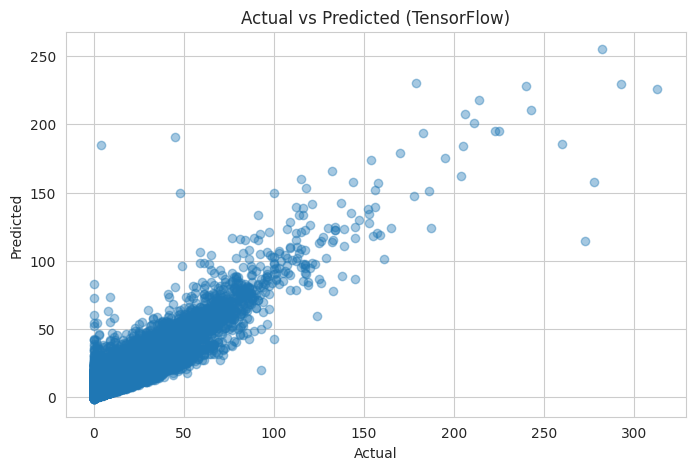

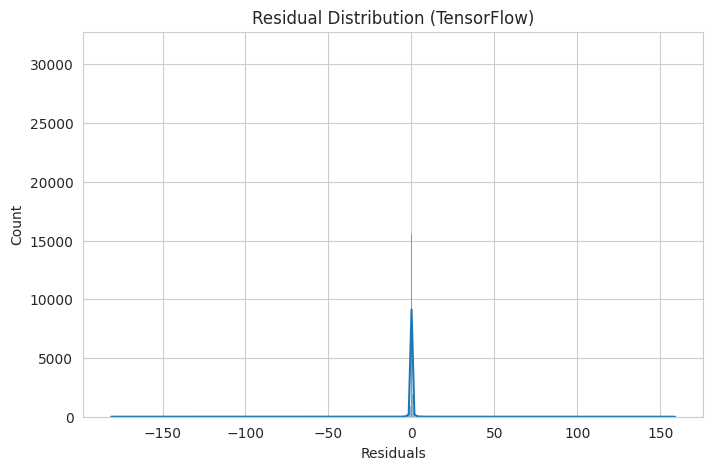

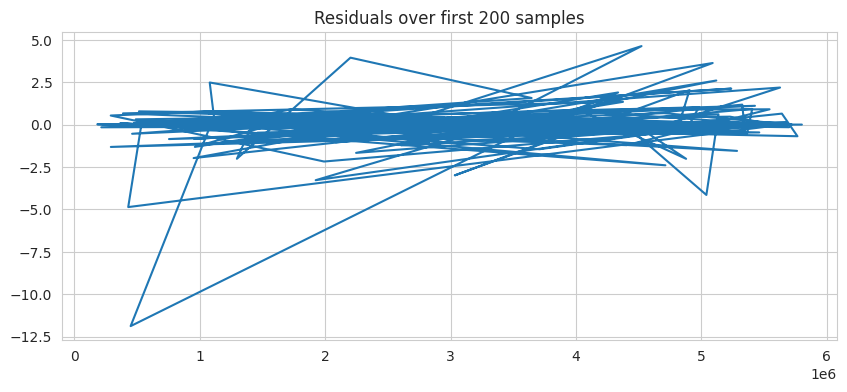

In [ ]:
# BLOCK-20: Technical Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Actual vs Predicted
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_final_tf, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (TensorFlow)")
plt.show()

# 2. Residual Distribution
residuals = y_test - y_pred_final_tf
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution (TensorFlow)")
plt.xlabel("Residuals")
plt.show()

# 3. Residual Time Plot
plt.figure(figsize=(10,4))
plt.plot(residuals[:200])
plt.title("Residuals over first 200 samples")
plt.show()

Stockout Rate: 2.08%


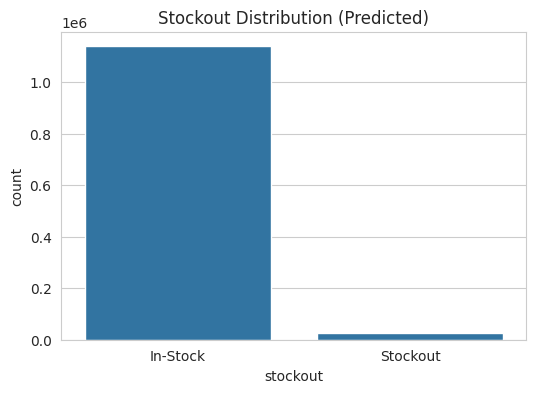

In [ ]:
# BLOCK-21: Business Visualization (Stockout Cases)

# Create a DataFrame for visualization using the test set's actuals and predictions.
# y_test and y_pred_final_tf are aligned by the splitting process.
df_vis = pd.DataFrame({
    'actual_sales': y_test,
    'predicted_demand': y_pred_final_tf
})

# Retrieve the 'inventory_level' corresponding to the test set indices from the original df_fe
# This ensures that 'inventory_level' also aligns with the test data
df_vis['inventory_level'] = df_fe.loc[y_test.index, 'inventory_level']

df_vis['stockout'] = (df_vis['predicted_demand'] > df_vis['inventory_level']).astype(int)

stockout_rate = df_vis['stockout'].mean() * 100

print(f"Stockout Rate: {stockout_rate:.2f}%")

plt.figure(figsize=(6,4))
sns.countplot(x='stockout', data=df_vis)
plt.title("Stockout Distribution (Predicted)")
plt.xticks([0,1], ['In-Stock', 'Stockout'])
plt.show()

In [ ]:
# BLOCK-22: Inference Function

def predict_stockout(item_id, date, inventory_level):
    # Filter sample
    # Use df_fe and features which are already defined
    sample = df_fe[(df_fe['id'] == item_id) & (df_fe['date'] == pd.to_datetime(date))]

    if sample.empty:
        return "No matching item/date found."

    X_sample = sample[features]  # Use your feature columns

    # scale
    X_sample_scaled = scaler_final.transform(X_sample)

    # predict
    pred = tf_final.predict(X_sample_scaled).flatten()[0]

    # stockout decision
    if pred > inventory_level:
        result = "STOCKOUT RISK"
    else:
        result = "IN-STOCK"

    return f"Predicted Demand: {pred:.2f}\nInventory: {inventory_level}\nStatus: {result}"

In [ ]:
# BLOCK-23: Demo Scenarios

# Note: df_fe was filtered for 'CA_1' store in BLOCK-4.
# The item_id should reflect an item from the CA_1 store.
# Example item_id from df_fe: 'FOODS_1_001_CA_1_validation'
# Example date from df_fe: '2016-04-24'

print("Demo Scenario 1 (Item from CA_1 store, higher inventory):")
print(predict_stockout(
    item_id="FOODS_1_001_CA_1_validation", # Using an item from CA_1 store
    date="2016-04-24", # Using a valid date within the filtered df_fe
    inventory_level=5
))

print("\nDemo Scenario 2 (Item from CA_1 store, lower inventory):")
print(predict_stockout(
    item_id="FOODS_1_001_CA_1_validation", # Using an item from CA_1 store
    date="2016-04-24", # Using a valid date within the filtered df_fe
    inventory_level=1
))

Demo Scenario 1 (Item from CA_1 store, higher inventory):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Demand: 0.37
Inventory: 5
Status: IN-STOCK

Demo Scenario 2 (Item from CA_1 store, lower inventory):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Demand: 0.37
Inventory: 1
Status: IN-STOCK


In [ ]:
# BLOCK-24: Export Artifacts

import joblib
import json

# Save model
tf_final.save("model_tf.h5")

# Save scaler
joblib.dump(scaler_final, "scaler.pkl")

# Save metrics
metrics = {
    "MAE": float(mae_tf),
    "RMSE": float(rmse_tf),
    "R2": float(r2_tf)
}
with open("metrics.json", "w") as f:
    json.dump(metrics, f)

print("Artifacts saved: model_tf.h5, scaler.pkl, metrics.json")

Artifacts saved: model_tf.h5, scaler.pkl, metrics.json


In [ ]:
# BLOCK-24: Export Artifacts

import joblib
import json

# Save model
tf_final.save("model_tf.h5")

# Save scaler
joblib.dump(scaler_final, "scaler.pkl")

# Save metrics
metrics = {
    "MAE": float(mae_tf),
    "RMSE": float(rmse_tf),
    "R2": float(r2_tf)
}
with open("metrics.json", "w") as f:
    json.dump(metrics, f)

print("Artifacts saved: model_tf.h5, scaler.pkl, metrics.json")

Artifacts saved: model_tf.h5, scaler.pkl, metrics.json


In [ ]:
# BLOCK-25: Summary + Future Work

print("WEEK-4 COMPLETED\n")
print("Best Model: TensorFlow Neural Network (Final)")
print("\nFuture Work Suggestions:")
print("1. Use LSTM for sequence forecasting")
print("2. Add price & promotion data")
print("3. Add warehouse lead time")
print("4. Deploy inference on FastAPI or Streamlit")
print("5. Build real-time stockout alert dashboard")

WEEK-4 COMPLETED

Best Model: TensorFlow Neural Network (Final)

Future Work Suggestions:
1. Use LSTM for sequence forecasting
2. Add price & promotion data
3. Add warehouse lead time
4. Deploy inference on FastAPI or Streamlit
5. Build real-time stockout alert dashboard
